In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
INPUT64_OUTPUT12 = '../64input_12output_derk'
ONLY_PISTOL = '../only_pistol'
Q_LEARNING_1000_ACTIONS = '../q-learning-1000-actions'
Q_LEARNING_25_ACTIONS = '../q-learning-25-actions'

In [3]:
!ls {INPUT64_OUTPUT12} {ONLY_PISTOL} {Q_LEARNING_1000_ACTIONS} {Q_LEARNING_25_ACTIONS}

../64input_12output_derk:
64input_12output.ini  best_stats.pkl        species_stats.pkl
64input_12output.toml extensive_stats.pkl   winner.pkl

../only_pistol:
best_stats.pkl        only_pistol_neat.ini  species_stats.pkl
extensive_stats.pkl   only_pistol_neat.toml winner.pkl

../q-learning-1000-actions:
best_stats.pkl               q_learning_1000_actions.toml
extensive_stats.pkl          species_stats.pkl
q_learning_1000_actions.ini  winner.pkl

../q-learning-25-actions:
best_stats.pkl             q_learning_25_actions.toml
extensive_stats.pkl        species_stats.pkl
q_learning_25_actions.ini  winner.pkl


In [4]:
def load_run(directory):
    best_stats = pd.read_pickle(f'{directory}/best_stats.pkl')
    extensive_stats = pd.read_pickle(f'{directory}/extensive_stats.pkl')
    species_stats = pd.read_pickle(f'{directory}/species_stats.pkl')
    return best_stats, extensive_stats, species_stats

In [5]:
input64_bs, input64_ext, input64_spc = load_run(INPUT64_OUTPUT12)
only_pistol_bs, only_pistol_ext, only_pistol_spc = load_run(ONLY_PISTOL)
qlearning1000_bs, qlearning1000_ext, qlearning1000_spc = load_run(Q_LEARNING_1000_ACTIONS)
qlearning25_bs, qlearning25_ext, qlearning25_spc = load_run(Q_LEARNING_25_ACTIONS)

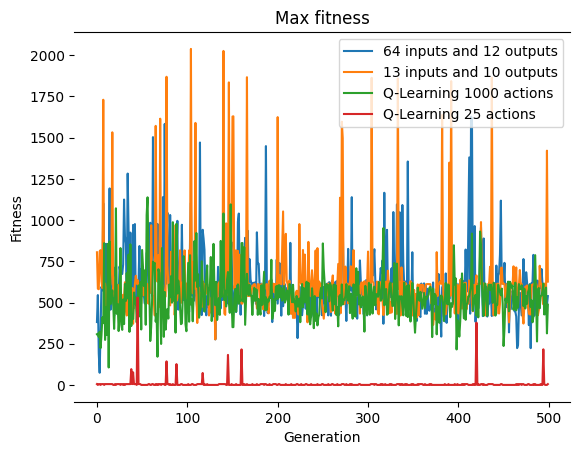

In [6]:
fig, ax = plt.subplots(1)
input64_bs.plot.line(x='generation', y='fitness', ax=ax, label='64 inputs and 12 outputs')
only_pistol_bs.plot.line(x='generation', y='fitness', ax=ax, label='13 inputs and 10 outputs')
qlearning1000_bs.plot.line(x='generation', y='fitness', ax=ax, label='Q-Learning 1000 actions')
qlearning25_bs.plot.line(x='generation', y='fitness', ax=ax, label='Q-Learning 25 actions')
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness")
ax.set_title("Max fitness")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()
fig.savefig("../assets/images/fitness_over_iterations_derk_neat.pdf", bbox_inches='tight')
plt.show()

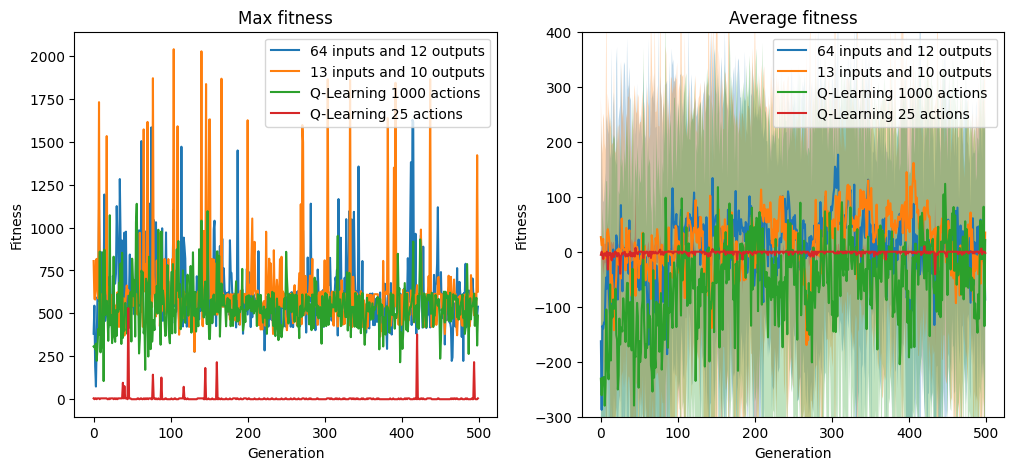

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
input64_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='64 inputs and 12 outputs')
only_pistol_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='13 inputs and 10 outputs')
qlearning1000_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='Q-Learning 1000 actions')
qlearning25_bs.plot.line(x='generation', y='fitness', ax=axs[0], label='Q-Learning 25 actions')
input64_bs.plot.line(x='generation', y='mean', ax=axs[1], label='64 inputs and 12 outputs')
only_pistol_bs.plot.line(x='generation', y='mean', ax=axs[1], label='13 inputs and 10 outputs')
qlearning1000_bs.plot.line(x='generation', y='mean', ax=axs[1], label='Q-Learning 1000 actions')
qlearning25_bs.plot.line(x='generation', y='mean', ax=axs[1], label='Q-Learning 25 actions')
axs[1].fill_between(
    input64_bs.generation,
    input64_bs['mean'] - input64_bs.stdev,
    input64_bs['mean'] + input64_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    only_pistol_bs.generation,
    only_pistol_bs['mean'] - only_pistol_bs.stdev,
    only_pistol_bs['mean'] + only_pistol_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    qlearning1000_bs.generation,
    qlearning1000_bs['mean'] - qlearning1000_bs.stdev,
    qlearning1000_bs['mean'] + qlearning1000_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].fill_between(
    qlearning25_bs.generation,
    qlearning25_bs['mean'] - qlearning25_bs.stdev,
    qlearning25_bs['mean'] + qlearning25_bs.stdev,
    alpha=0.3,
    label='Standard Deviation'
)
axs[1].set_ylim([-300, 400])
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")
axs[0].set_ylabel("Fitness")
axs[1].set_ylabel("Fitness")
axs[0].set_title("Max fitness")
axs[1].set_title("Average fitness")
plt.show()

In [8]:
input64_ext.tail()

,generation,species,genome,fitness
14995,499,492,9950,-444.264648
14996,499,485,9932,538.987488
14997,499,485,9951,-14.938038
14998,499,485,9952,-105.785561
14999,499,513,9938,-101.140503


In [9]:
input64_bs.head()

,generation,fitness,nodes_number,connections_number,enabled_connections_number,mean,median,stdev
0,0,381.622498,42,456,456,-162.846308,-78.732285,252.580690
1,1,545.074951,42,456,456,-287.522965,-46.774752,526.524436
2,2,192.487503,42,456,456,-134.725179,0.000000,268.028921
3,3,73.775002,42,456,456,-139.653575,-33.232498,229.839069
4,4,340.553711,42,443,381,-128.690456,-36.739250,221.315356


/var/folders/sg/lrj8tsl93p57mx7wcnk45jm40000gp/T/ipykernel_61486/1655047042.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


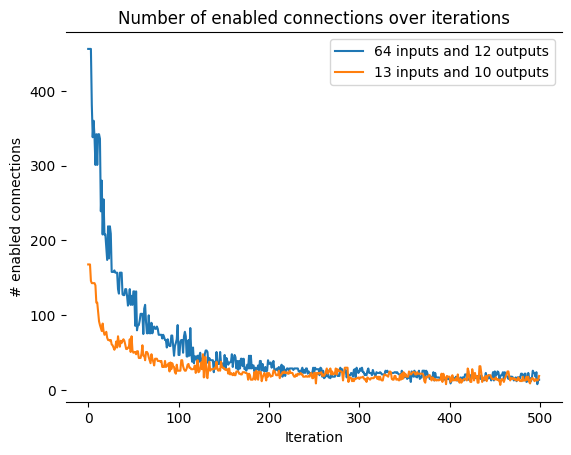

In [10]:
fig, ax = plt.subplots(1)
input64_bs.enabled_connections_number.plot(ax=ax, label='64 inputs and 12 outputs')
only_pistol_bs.enabled_connections_number.plot(ax=ax, label='13 inputs and 10 outputs')
ax.set_title("Number of enabled connections over iterations")
ax.set_ylabel("# enabled connections")
ax.set_xlabel("Iteration")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()
fig.savefig("../assets/images/n_enabled_connections_over_iterations_derk_neat.pdf", bbox_inches='tight')
fig.show()

/var/folders/sg/lrj8tsl93p57mx7wcnk45jm40000gp/T/ipykernel_61486/2517699545.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


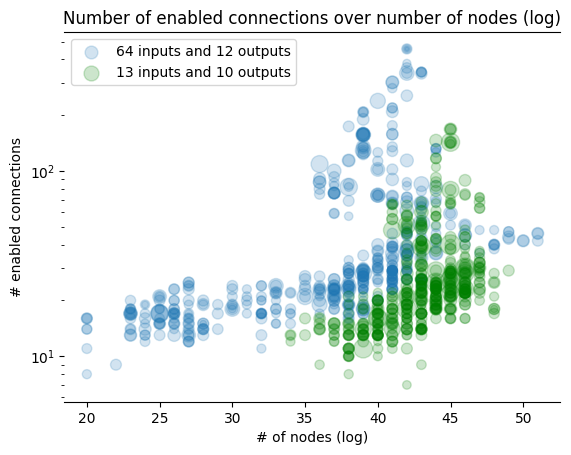

In [11]:
fig, ax = plt.subplots(1)
input64_bs['fitness_for_size'] = input64_bs.fitness / 10
input64_bs.plot.scatter(y='enabled_connections_number', x='nodes_number', ax=ax, label='64 inputs and 12 outputs', alpha=0.2, s='fitness_for_size')
only_pistol_bs['fitness_for_size'] = only_pistol_bs.fitness / 10
only_pistol_bs.plot.scatter(y='enabled_connections_number', x='nodes_number', ax=ax, label='13 inputs and 10 outputs', c='green', alpha=0.2, s='fitness_for_size')
ax.set_yscale('log')
ax.set_title("Number of enabled connections over number of nodes (log)")
ax.set_ylabel("# enabled connections")
ax.set_xlabel("# of nodes (log)")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend()
fig.savefig("../assets/images/n_enabled_connections_over_n_nodes_derk_neat.pdf", bbox_inches='tight')
fig.show()

In [12]:
input64_spc['active_species'] = input64_spc.species_sizes.apply(lambda x: np.sum(np.array(x)!=0))
only_pistol_spc['active_species'] = only_pistol_spc.species_sizes.apply(lambda x: np.sum(np.array(x)!=0))
qlearning1000_spc['active_species'] = qlearning1000_spc.species_sizes.apply(lambda x: np.sum(np.array(x)!=0))
qlearning25_spc['active_species'] = qlearning25_spc.species_sizes.apply(lambda x: np.sum(np.array(x)!=0))

/var/folders/sg/lrj8tsl93p57mx7wcnk45jm40000gp/T/ipykernel_61486/4278108550.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


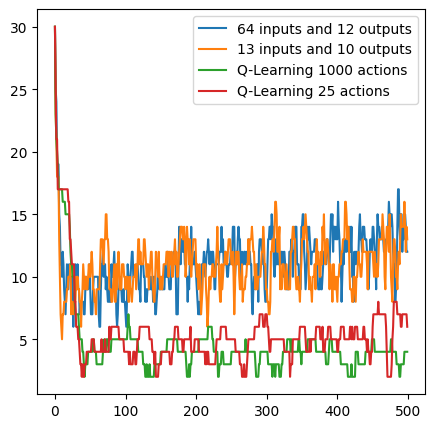

In [13]:
fig, ax = plt.subplots(1, figsize=(5, 5))
input64_spc.active_species.plot(ax=ax, label='64 inputs and 12 outputs')
only_pistol_spc.active_species.plot(ax=ax, label='13 inputs and 10 outputs')
qlearning1000_spc.active_species.plot(ax=ax, label='Q-Learning 1000 actions')
qlearning25_spc.active_species.plot(ax=ax, label='Q-Learning 25 actions')
ax.legend()
fig.show()